In [7]:
import torch
import torch.nn as nn
import numpy as np

x = torch.randn(32, 96, 7)  # (batch_size, seq_len, feature_dim)
y = torch.randn(32, 96, 7)  # (batch_size, seq_len, feature_dim)

x_max = torch.max(x, dim=1)[0]
y_max = torch.max(y, dim=1)[0]


In [3]:
import numpy as np

# 原始数据
x = np.array([1, 0, 0, 0, 0, 0])

# 计算均值和标准差
mean = x.mean()  # 0.16666666666666666
std = x.std(ddof=0)  # 0.37267799624996495 （总体标准差）

# 标准差归一化
normalized = (x - mean) / std

normalized

array([ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
       -0.4472136 ])

In [46]:
import torch
import torch.nn.functional as F

x = torch.tensor(
    [
        [521.2867, 590.7593, 611.69476, 627.48517, 638.06085],
        [940.40515, 1082.2048, 1092.7427, 1112.4952, 1135.8943],
        [6.5, 6.5, 6.5, 6.5, 6.5],
    ]
)
# 缩放x到0到1之间
x_min = x.min(dim=1, keepdim=True)[0]
x_max = x.max(dim=1, keepdim=True)[0]
x = (x - x_min) / (x_max - x_min + 1e-8)
print(x)
x = torch.exp(-x)
print(x)
x = F.softmax(x, dim=1)
x

tensor([[0.0000, 0.5949, 0.7742, 0.9094, 1.0000],
        [0.0000, 0.7254, 0.7793, 0.8803, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[1.0000, 0.5516, 0.4611, 0.4028, 0.3679],
        [1.0000, 0.4842, 0.4587, 0.4147, 0.3679],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])


tensor([[0.3027, 0.1933, 0.1766, 0.1666, 0.1609],
        [0.3061, 0.1827, 0.1781, 0.1704, 0.1627],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000]])

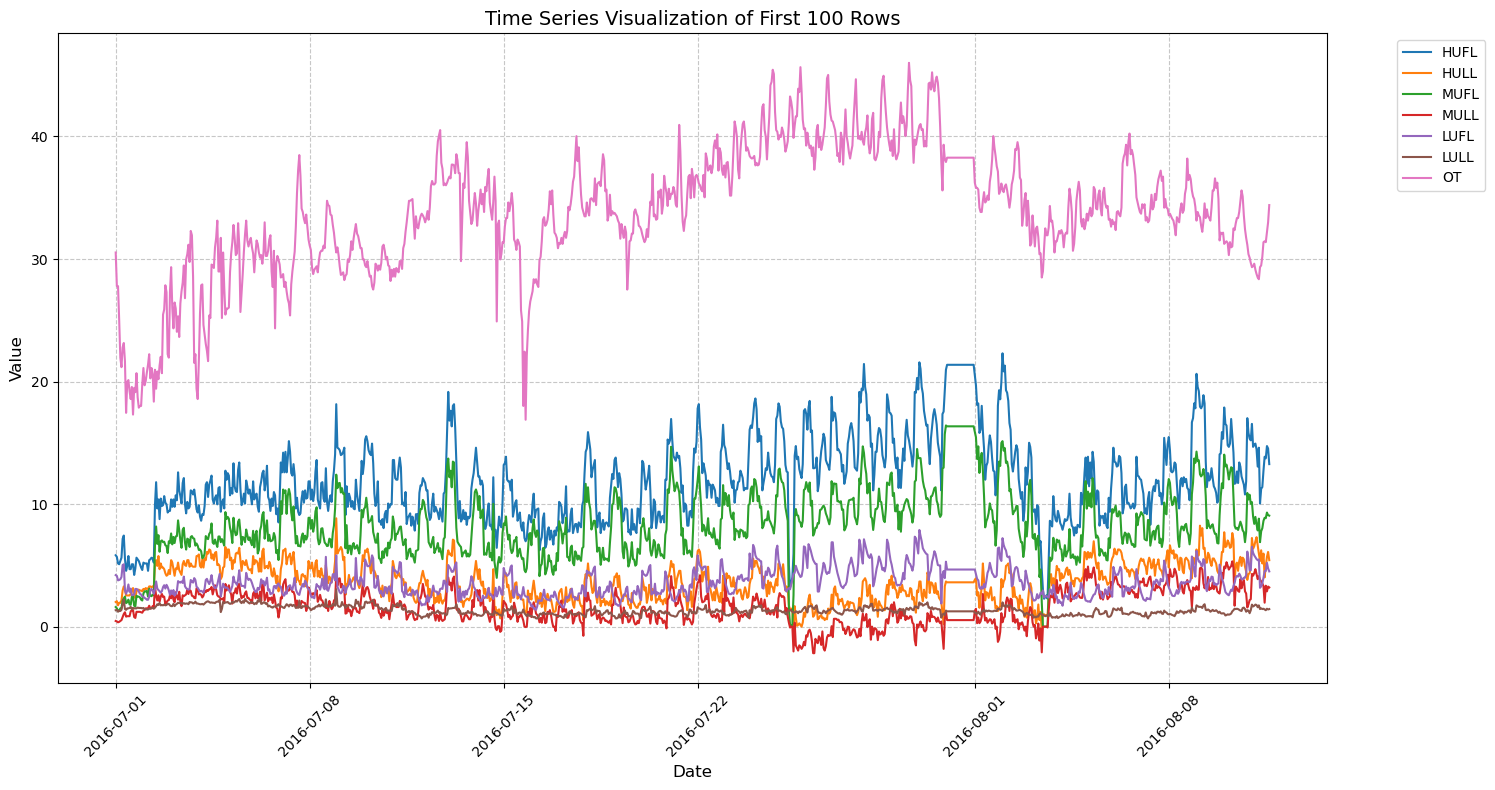

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据并指定日期列
df = pd.read_csv('dataset/all_datasets/ETT-small/ETTh1.csv', 
                 parse_dates=['date'], 
                 nrows=1000)  # 仅读取前100行

# 设置日期为索引
df.set_index('date', inplace=True)

# 创建画布和图形
plt.figure(figsize=(15, 8))

# 绘制所有数值列的折线图
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# 添加图表元素
plt.title('Time Series Visualization of First 100 Rows', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)  # 旋转日期标签避免重叠
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例位置
plt.tight_layout()  # 自动调整布局
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格

# 显示图表
plt.show()